# Popularity ratio based on explicit

Importamos las librerias

In [1]:
import pandas as pd
import seaborn as sns

Importamos y visualizamos el dataset

In [3]:
df_spo = pd.read_csv('/kaggle/input/spotify-global-top-50-song-dataset/playlist.csv')
df_spo.head()

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31


# Cleaning Data

Limpiamos los duplicados usando el nombre de track como subset

In [8]:
df_spo['track_name'].duplicated().value_counts()

True     290
False     60
Name: track_name, dtype: int64

In [9]:
df_spo.drop_duplicates(subset='track_name', inplace=True)

**Una vez limpio de duplicados Reiniciamos el index**

In [11]:
df_spo.reset_index(drop=True)

,track_name,track_add_date,track_add_time,multiple_artists_bool,name_of_artists,album_name,album_release_date,album_release_date_precision,number_of_tracks_in_album,position_in_playlist,track_duration_ms,track_popularity,track_explicit,images_path,data_collection_date
0,Flowers,2023-03-31,10:02:16,False,['Miley Cyrus'],Endless Summer Vacation,2023-03-10,day,13,1,200600,87,False,./images/flowers_miley_cyrus.jpg,2023-03-31
1,Kill Bill,2023-03-31,10:02:16,False,['SZA'],SOS,2022-12-08,day,23,2,153946,94,False,./images/kill_bill_sza.jpg,2023-03-31
2,TQG,2023-03-31,10:02:16,True,"['KAROL G', 'Shakira']",MAÑANA SERÁ BONITO,2023-02-24,day,17,3,197933,97,True,./images/tqg_karol_g.jpg,2023-03-31
3,BESO,2023-03-31,10:02:16,True,"['ROSALÍA', 'Rauw Alejandro']",RR,2023-03-24,day,3,4,194543,87,False,./images/beso_rosala.jpg,2023-03-31
4,Boy's a liar Pt. 2,2023-03-31,10:02:16,True,"['PinkPantheress', 'Ice Spice']",Boy's a liar Pt. 2,2023-02-03,day,2,5,131013,97,False,./images/boys_a_liar_pt_2_pinkpantheress.jpg,2023-03-31
5,Ella Baila Sola,2023-03-31,10:02:16,True,"['Eslabon Armado', 'Peso Pluma']",Ella Baila Sola,2023-03-16,day,1,6,165671,90,False,./images/ella_baila_sola_eslabon_armado.jpg,2023-03-31
6,Die For You (with Ariana Grande) - Remix,2023-03-31,10:02:16,True,"['The Weeknd', 'Ariana Grande']",Starboy (Deluxe),2023-03-14,day,21,7,232857,81,False,./images/die_for_you_with_ariana_grande_remix_...,2023-03-31
7,As It Was,2023-03-31,10:02:16,False,['Harry Styles'],Harry's House,2022-05-20,day,13,8,167303,91,False,./images/as_it_was_harry_styles.jpg,2023-03-31
8,La Bebe - Remix,2023-03-31,10:02:16,True,"['Yng Lvcas', 'Peso Pluma']",La Bebe (Remix),2023-03-17,day,2,9,234352,86,True,./images/la_bebe_remix_yng_lvcas.jpg,2023-03-31
9,Creepin' (with The Weeknd & 21 Savage),2023-03-31,10:02:16,True,"['Metro Boomin', 'The Weeknd', '21 Savage']",HEROES & VILLAINS,2022-12-02,day,15,10,221520,96,True,./images/creepin_with_the_weeknd_21_savage_met...,2023-03-31


In [12]:
df_spo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 345
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   track_name                    60 non-null     object
 1   track_add_date                60 non-null     object
 2   track_add_time                60 non-null     object
 3   multiple_artists_bool         60 non-null     bool  
 4   name_of_artists               60 non-null     object
 5   album_name                    60 non-null     object
 6   album_release_date            60 non-null     object
 7   album_release_date_precision  60 non-null     object
 8   number_of_tracks_in_album     60 non-null     int64 
 9   position_in_playlist          60 non-null     int64 
 10  track_duration_ms             60 non-null     int64 
 11  track_popularity              60 non-null     int64 
 12  track_explicit                60 non-null     bool  
 13  images_path          

# Visualizamos los datos

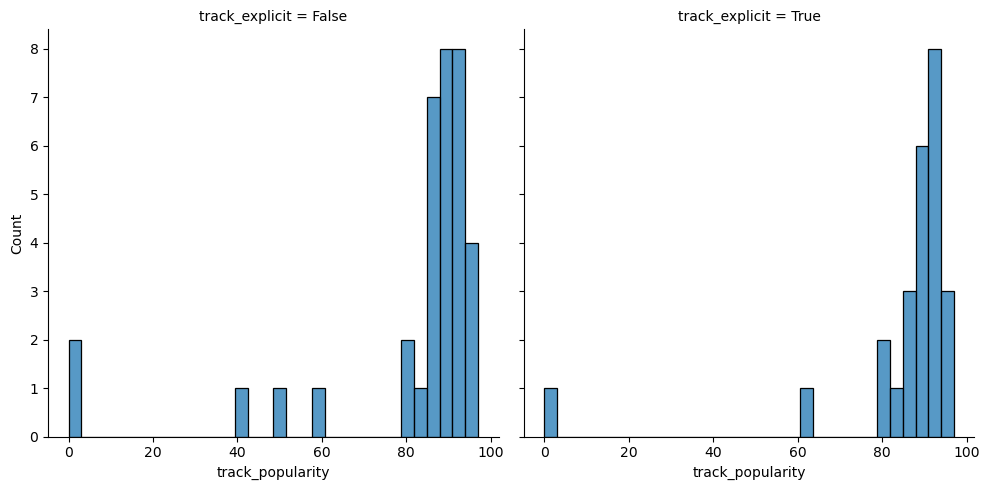

In [13]:
sns.displot(data=df_spo, x='track_popularity', col='track_explicit')

# Conclusión:
# Los tracks 'No Explicitos' alcanzan mayor grado de popularidad